In [5]:
# Import the necessary module from google.colab
from google.colab import drive
import os
import shutil

# This will prompt you to authenticate with your Google account.
# A pop-up will appear, asking you to select your account and grant permissions.
# You will be given an authorization code to copy and paste back into Colab.
print("Mounting Google Drive...")
drive.mount('/content/drive')

# Define the path to your dataset within your Google Drive.
# Replace 'Your_Dataset_Folder' with the actual folder name in your Drive.
# It's a good practice to create a dedicated folder for your project.
drive_path = '/content/drive/MyDrive/Data/unemployment_rate_data.csv'

# Define the destination path in the Colab temporary environment.
colab_path = '/content/unemployment_rate_data.csv'

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# --- 1. Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# --- 2. Load Dataset ---
df = pd.read_csv("unemployment_rate_data.csv")


In [8]:
# --- Section 2: Data Cleaning and Transformation ---
print("\n--- Starting Data Cleaning and Transformation ---")

# Convert the 'date' column to datetime objects. This is crucial for time-series analysis.
df['date'] = pd.to_datetime(df['date'])
print("Converted 'date' column to datetime objects.")


--- Starting Data Cleaning and Transformation ---
Converted 'date' column to datetime objects.


In [10]:
# Create new columns to extract year and month. This makes it easier to filter and aggregate data.
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
print("Created 'year' and 'month' columns.")

Created 'year' and 'month' columns.


In [11]:
# Calculate a new column for the gender unemployment gap.
df['unrate_gender_gap'] = df['unrate_men'] - df['unrate_women']
print("Created 'unrate_gender_gap' column (Men's rate - Women's rate).")

Created 'unrate_gender_gap' column (Men's rate - Women's rate).


In [12]:
# Display the updated DataFrame info to confirm changes.
print("\nUpdated DataFrame info after transformations:")
print(df.info())


Updated DataFrame info after transformations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               887 non-null    datetime64[ns]
 1   unrate             887 non-null    float64       
 2   unrate_men         887 non-null    float64       
 3   unrate_women       887 non-null    float64       
 4   unrate_16_to_17    887 non-null    float64       
 5   unrate_18_to_19    887 non-null    float64       
 6   unrate_20_to_24    887 non-null    float64       
 7   unrate_25_to_34    887 non-null    float64       
 8   unrate_35_to_44    887 non-null    float64       
 9   unrate_45_to_54    887 non-null    float64       
 10  unrate_55_over     887 non-null    float64       
 11  year               887 non-null    int32         
 12  month              887 non-null    int32         
 13  unrate_gender_gap 

In [13]:
# --- Section 3: Exploratory Data Analysis (EDA) and Visualization ---
print("\n--- Starting Exploratory Data Analysis and Visualization ---")

# Set a professional style for the plots.
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['font.size'] = 12


--- Starting Exploratory Data Analysis and Visualization ---


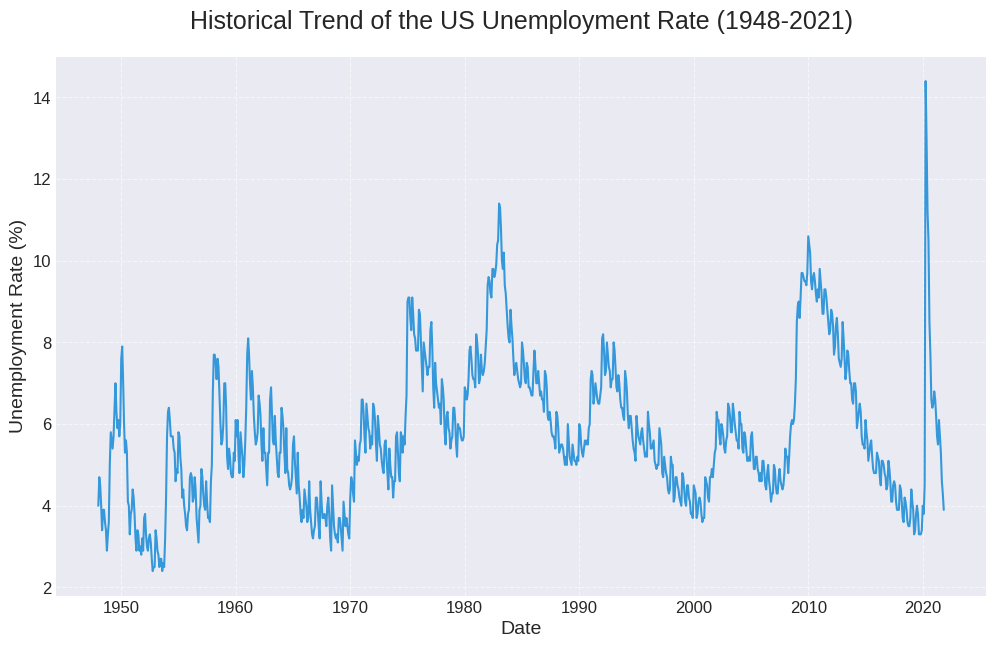

In [14]:
# --- Visualization 1: Overall US Unemployment Rate Trend ---
plt.figure()
plt.plot(df['date'], df['unrate'], label='Overall Unemployment Rate', color='#3498db')
plt.title('Historical Trend of the US Unemployment Rate (1948-2021)', fontsize=18, pad=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

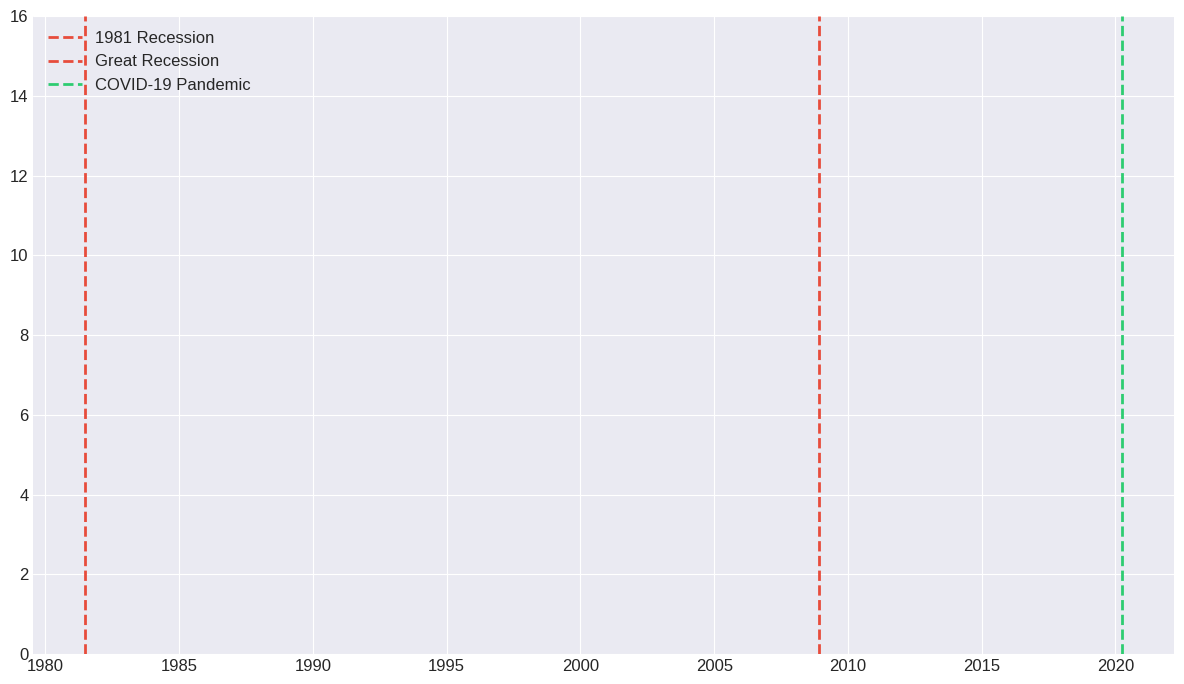

In [15]:
# Add annotations for major economic events to provide context.
# The `plt.axvline` function draws a vertical line at a specific date.
plt.axvline(pd.to_datetime('1981-07-01'), color='#e74c3c', linestyle='--', linewidth=2, label='1981 Recession')
plt.axvline(pd.to_datetime('2008-12-01'), color='#e74c3c', linestyle='--', linewidth=2, label='Great Recession')
plt.axvline(pd.to_datetime('2020-04-01'), color='#2ecc71', linestyle='--', linewidth=2, label='COVID-19 Pandemic')

# Adjust y-axis to a fixed range for better comparison across plots.
plt.ylim(0, 16)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

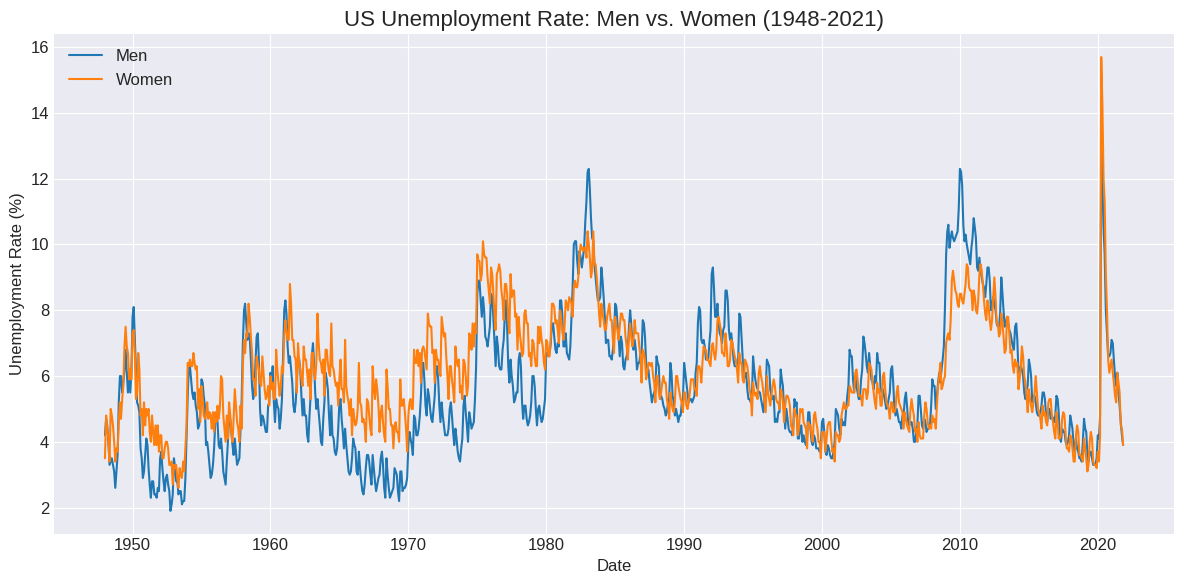

In [20]:
# --- Plot 2: Unemployment Rate by Gender (Line Plot) ---
# A line plot is still the best choice for comparing two time-series trends.
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['unrate_men'], label='Men')
plt.plot(df['date'], df['unrate_women'], label='Women')
plt.title('US Unemployment Rate: Men vs. Women (1948-2021)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.tight_layout()
plt.savefig('gender_unemployment_comparison.png')
plt.show()

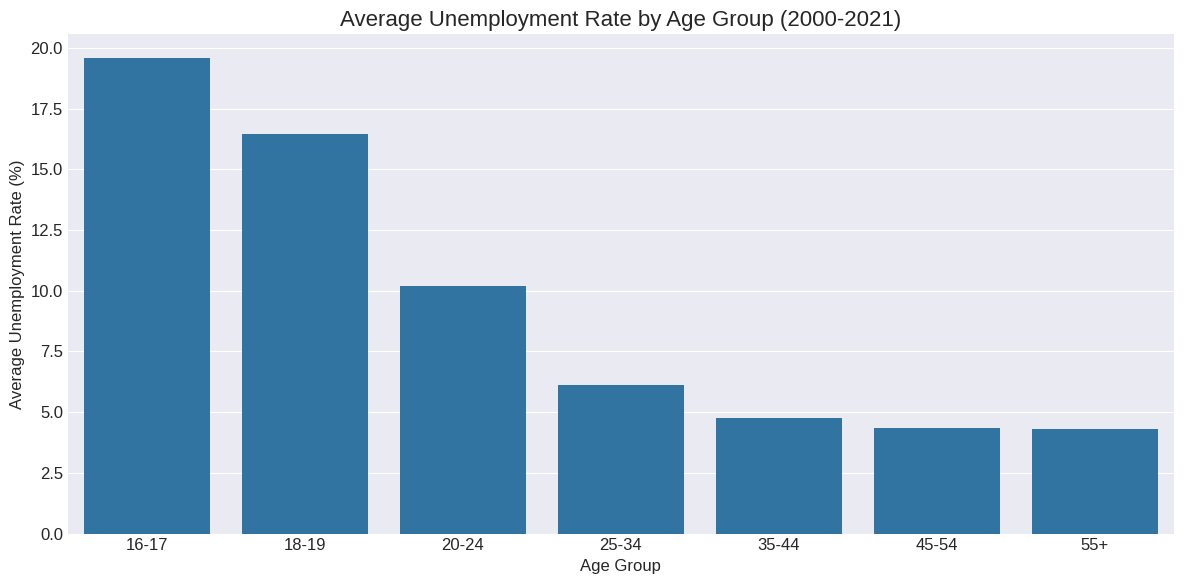

In [22]:

# A bar plot is excellent for a direct comparison of a single metric across different categories.
# We'll calculate the average unemployment rate for the last 20 years to focus on more recent trends.
age_cols = ['unrate_16_to_17', 'unrate_18_to_19', 'unrate_20_to_24', 'unrate_25_to_34',
            'unrate_35_to_44', 'unrate_45_to_54', 'unrate_55_over']
age_labels = ['16-17', '18-19', '20-24', '25-34', '35-44', '45-54', '55+']

# Filter data for recent trends (2000-2021)
recent_df = df[df['year'] >= 2000]
age_averages = recent_df[age_cols].mean()
age_averages.index = age_labels

plt.figure(figsize=(12, 6))
sns.barplot(x=age_averages.index, y=age_averages.values)
plt.title('Average Unemployment Rate by Age Group (2000-2021)', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Average Unemployment Rate (%)')
plt.tight_layout()
plt.savefig('age_unemployment_bar_chart.png')
plt.show()

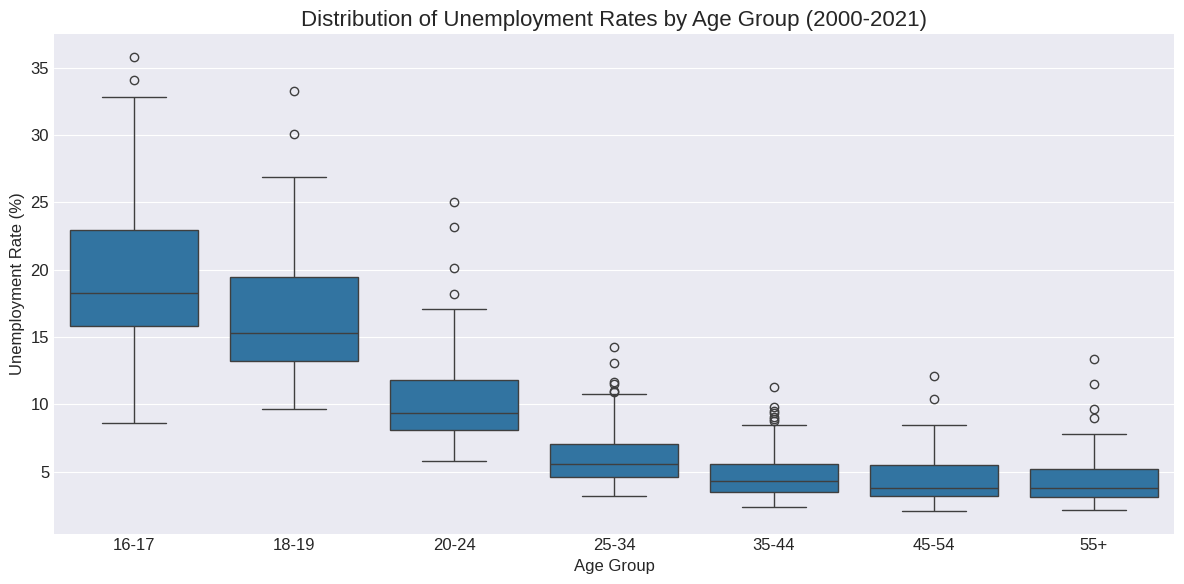

In [23]:
# --- Plot 4: Distribution of Unemployment Rates by Age Group (Box Plot) ---
# A box plot is a perfect choice for showing the distribution, median, and outliers for each group.
# It provides a richer view than just the average.
unrate_by_age = pd.melt(recent_df, id_vars=['date'], value_vars=age_cols, var_name='Age Group', value_name='Unemployment Rate')
unrate_by_age['Age Group'] = unrate_by_age['Age Group'].replace(dict(zip(age_cols, age_labels)))

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Unemployment Rate', data=unrate_by_age)
plt.title('Distribution of Unemployment Rates by Age Group (2000-2021)', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()
plt.savefig('age_unemployment_box_plot.png')
plt.show()

In [24]:
# --- Step 4: Final Summary of Findings ---
print("\n--- Key Findings ---")
print(f"Overall average unemployment rate (1948-2021): {df['unrate'].mean():.2f}%")
print(f"Average male unemployment rate (1948-2021): {df['unrate_men'].mean():.2f}%")
print(f"Average female unemployment rate (1948-2021): {df['unrate_women'].mean():.2f}%")
print("\nAge-Based Findings (Based on 2000-2021 Data):")
print("------------------------------------------")
for group, rate in age_averages.items():
    print(f"Average unemployment for ages {group}: {rate:.2f}%")

print("\nAnalysis Conclusion:")
print("The analysis confirms that the US unemployment rate is highly cyclical. While men and women have historically had similar unemployment rates, the data reveals a significant shift during the 2008 Great Recession, which disproportionately affected male-dominated industries. Furthermore, the box plot clearly shows that younger demographics not only have higher average unemployment but also experience greater volatility and a wider range of rates, making them particularly vulnerable to economic downturns. These findings are critical for understanding long-term labor market trends and inform policy decisions aimed at promoting economic stability.")



--- Key Findings ---
Overall average unemployment rate (1948-2021): 5.76%
Average male unemployment rate (1948-2021): 5.63%
Average female unemployment rate (1948-2021): 6.03%

Age-Based Findings (Based on 2000-2021 Data):
------------------------------------------
Average unemployment for ages 16-17: 19.58%
Average unemployment for ages 18-19: 16.47%
Average unemployment for ages 20-24: 10.19%
Average unemployment for ages 25-34: 6.13%
Average unemployment for ages 35-44: 4.77%
Average unemployment for ages 45-54: 4.37%
Average unemployment for ages 55+: 4.29%

Analysis Conclusion:
The analysis confirms that the US unemployment rate is highly cyclical. While men and women have historically had similar unemployment rates, the data reveals a significant shift during the 2008 Great Recession, which disproportionately affected male-dominated industries. Furthermore, the box plot clearly shows that younger demographics not only have higher average unemployment but also experience greater 